<a href="https://colab.research.google.com/github/Andoniadou-Lab/consensus_pituitary_atlas/blob/main/Curation_assigning_sexes_to_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install packages

In [3]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.5 MB/s eta 0:00:00


In [4]:
import anndata
import scanpy as sc

In [5]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
np.random.seed(42)
df = pd.read_excel('/content/drive/MyDrive/pituitary_atlas/source_table/pituitary_atlas.xlsx')
pituitary_atlas = df.copy()
#only keep sn or sc for now
df = df[df['Modality'].isin(['sc','sn','multi_rna'])]
df = df[df['species'].isin(['mouse'])]
df.reset_index(drop=True, inplace=True)
df

,GEO,SRA_ID,Name,Conditions,Normal,Background,Sorted,Author,DOI,Age,...,filtering_junk,median_cellassign_prob,most_recent_workflow,n_cells,processed_atac,passed_qc_tcc,tcc_pseudobulked,Core,Notes 1,Notes 2
0,GSM4594333,SRX8489818,M-Pituitary,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,1278.0,0.0,1.0,v_0.01,1.0,NaN,NaN
1,GSM4594334,SRX8489819,FM_Pit_1-1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,8236.0,0.0,1.0,v_0.01,1.0,NaN,NaN
2,GSM4594335,SRX8489820,FM_Pit_1-2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,7092.0,0.0,1.0,v_0.01,1.0,NaN,NaN
3,GSM4594336,SRX8489821,MM_Pit_4-1,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,1755.0,0.0,1.0,v_0.01,1.0,NaN,NaN
4,GSM4594337,SRX8489822,MM_Pit_1v2,normal,1,C57BL/6,0,Ruf-Zamojski et al. (2021),10.1038/s41467-021-22859-w,10-12 weeks,...,1.0,1.0,v_0.01,416.0,0.0,1.0,v_0.01,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,GSM7663099,SRX21168593,"Pituitary, young, sample1, scRNA-seq",normal,1,C57BL/6,0,Wei et al. (2025),NaN,6 months,...,1.0,1.0,v_0.01,10116.0,NaN,NaN,NaN,1.0,missing sex,NaN
224,GSM7663100,SRX21168594,"Pituitary, aged, sample1, scRNA-seq",normal,1,C57BL/6,0,Wei et al. (2025),NaN,24 months,...,1.0,1.0,v_0.01,7710.0,NaN,NaN,NaN,1.0,missing sex,NaN
225,GSM7663101,SRX21168595,"Pituitary, young, sample2, scRNA-seq",normal,1,C57BL/6,0,Wei et al. (2025),NaN,6 months,...,1.0,1.0,v_0.01,7736.0,NaN,NaN,NaN,1.0,missing sex,NaN
226,GSM7663102,SRX21168596,"Pituitary, aged, sample2, scRNA-seq",normal,1,C57BL/6,0,Wei et al. (2025),NaN,24 months,...,1.0,1.0,v_0.01,6507.0,NaN,NaN,NaN,1.0,missing sex,NaN


In [7]:
sex=[]
pct_xist=[]
pct_ddx3y=[]
pct_kdm5d=[]
sra=[]
for i in range(len(df)):

  SRA_ID=df["SRA_ID"][i]
  print(SRA_ID)
  try:
    adata = sc.read(f"/content/drive/MyDrive/pituitary_atlas/processed/nac/{SRA_ID}/analysis/adata_assigned.h5ad")
    #pct_xist
    sex_numeric = df.loc[df['SRA_ID'] == SRA_ID, 'Sex_numeric'].values[0]
    try:
      pctxist = np.sum(adata[:,"Xist"].X.toarray()>0) / adata.shape[0]
    except:
      pctxist = 0
    #pctDdx3y
    try:
      pctDdx3y = np.sum(adata[:,"Ddx3y"].X.toarray()>0) / adata.shape[0]
    except:
      pctDdx3y = 0
    #pctKdm5d
    try:
      pctKdm5d = np.sum(adata[:,"Kdm5d"].X.toarray()>0) / adata.shape[0]
    except:
      pctKdm5d = 0
    print(f"Sex: {sex_numeric}, Xist: {pctxist}, Ddx3y: {pctDdx3y}, Kdm5d: {pctKdm5d}")
    sex.append(sex_numeric)
    pct_xist.append(pctxist)
    pct_ddx3y.append(pctDdx3y)
    pct_kdm5d.append(pctKdm5d)
    sra.append(SRA_ID)
  except:
    print(f"No data for {SRA_ID}")

SRX8489818
Sex: 1.0, Xist: 0.001564945226917058, Ddx3y: 0.3435054773082942, Kdm5d: 0.08450704225352113
SRX8489819
Sex: 0.0, Xist: 0.915857212238951, Ddx3y: 0.06665857212238951, Kdm5d: 0.00048567265662943174
SRX8489820
Sex: 0.0, Xist: 0.9020022560631697, Ddx3y: 0.0724760293288212, Kdm5d: 0.0007050197405527354
SRX8489821
Sex: 1.0, Xist: 0.004558404558404558, Ddx3y: 0.5743589743589743, Kdm5d: 0.22564102564102564
SRX8489822
Sex: 1.0, Xist: 0.004807692307692308, Ddx3y: 0.4495192307692308, Kdm5d: 0.02403846153846154
SRX8489823
Sex: 1.0, Xist: 0.0054133858267716535, Ddx3y: 0.5600393700787402, Kdm5d: 0.11515748031496063
SRX8489824
Sex: 1.0, Xist: 0.003067484662576687, Ddx3y: 0.5773006134969325, Kdm5d: 0.1116564417177914
SRX8489834
Sex: 1.0, Xist: 0.002907421576128539, Ddx3y: 0.27161438408569244, Kdm5d: 0.16633511859219588
SRX8489835
Sex: 1.0, Xist: 0.002627179364700263, Ddx3y: 0.3040363028421304, Kdm5d: 0.21805588727012182
SRX8489836
Sex: 1.0, Xist: 0.002681444404719342, Ddx3y: 0.3183768323203

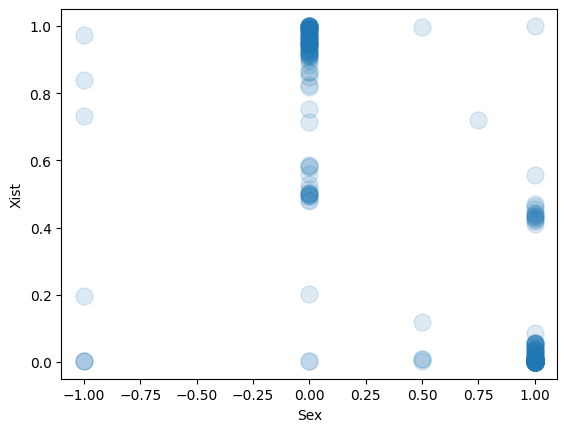

In [8]:
#plot sex_numeric vs xist
import matplotlib.pyplot as plt
plt.scatter(sex, pct_xist,alpha=0.15,s=150)
plt.xlabel("Sex")
plt.ylabel("Xist")
plt.show()

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Convert lists to numpy arrays
sex = np.array(sex)
X = np.column_stack((pct_xist, pct_ddx3y, pct_kdm5d))

# Split data into known and unknown sex
#if sex is not 0 or 1, set it to -1
sex[(sex!=0) & (sex!=1)] = -1


known_indices = sex != -1
unknown_indices = sex == -1

X_known = X[known_indices]
y_known = sex[known_indices]
X_unknown = X[unknown_indices]

# Split known data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Predict sex for unknown cases
unknown_predictions = model.predict(X_unknown)

# Print predictions for unknown cases
print("\nPredictions for Unknown Sex:")
for i, pred in enumerate(unknown_predictions):
    print(f"Sample {i+1}: {'Female' if pred == 0 else 'Male'}")

# If you want to update the original sex list with predictions
new_sex = sex.copy()
new_sex[unknown_indices] = unknown_predictions
print("\nUpdated sex list:")
print(new_sex)

Model Accuracy: 0.967741935483871

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        27
         1.0       1.00      0.94      0.97        35

    accuracy                           0.97        62
   macro avg       0.97      0.97      0.97        62
weighted avg       0.97      0.97      0.97        62


Predictions for Unknown Sex:
Sample 1: Male
Sample 2: Female
Sample 3: Male
Sample 4: Male
Sample 5: Female
Sample 6: Male
Sample 7: Female
Sample 8: Male
Sample 9: Male
Sample 10: Female
Sample 11: Male
Sample 12: Male
Sample 13: Female
Sample 14: Female
Sample 15: Female
Sample 16: Male
Sample 17: Male

Updated sex list:
[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 

In [10]:
# Evaluate on the entire dataset to check for mislabeling
all_predictions = model.predict(X)
mislabeled_indices = np.where((sex != -1) & (all_predictions != sex))[0]

print("\nPotentially Mislabeled Datapoints:")
if len(mislabeled_indices) > 0:
    for idx in mislabeled_indices:
        print(f"Index: {idx}, Original Label: {'Female' if sex[idx] == 0 else 'Male'}, "
              f"Predicted Label: {'Female' if all_predictions[idx] == 0 else 'Male'}")
        print(f"  Gene values: Xist={pct_xist[idx]:.4f}, DDX3Y={pct_ddx3y[idx]:.4f}, KDM5D={pct_kdm5d[idx]:.4f}")
else:
    print("No potentially mislabeled datapoints found.")

print(f"\nTotal number of potentially mislabeled datapoints: {len(mislabeled_indices)}")

#print sra ids
print("\nSRA IDs:")
for idx in mislabeled_indices:
    print(sra[idx])


Potentially Mislabeled Datapoints:
Index: 51, Original Label: Female, Predicted Label: Male
  Gene values: Xist=0.2025, DDX3Y=0.6234, KDM5D=0.2447
Index: 57, Original Label: Female, Predicted Label: Male
  Gene values: Xist=0.0028, DDX3Y=0.5281, KDM5D=0.1742
Index: 59, Original Label: Male, Predicted Label: Female
  Gene values: Xist=0.5554, DDX3Y=0.0054, KDM5D=0.0018
Index: 215, Original Label: Female, Predicted Label: Male
  Gene values: Xist=0.0039, DDX3Y=0.4333, KDM5D=0.3097
Index: 216, Original Label: Male, Predicted Label: Female
  Gene values: Xist=0.9989, DDX3Y=0.0006, KDM5D=0.0006

Total number of potentially mislabeled datapoints: 5

SRA IDs:
SRX21170825
SRX21986110
SRX21986112
SRX29174028
SRX29174029


# Plotting Xist vs logistic regression score.

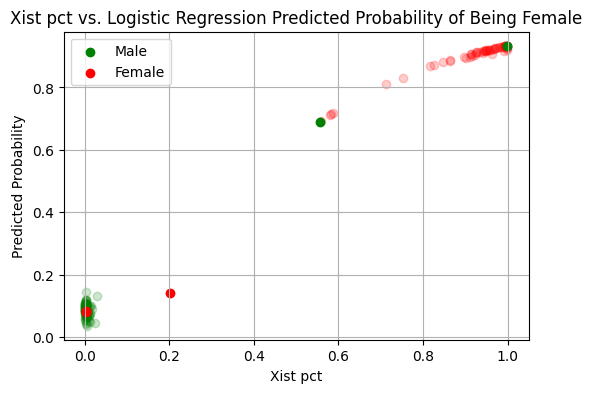

In [12]:
y_pred_proba = model.predict_proba(X_known)[:, 1]
y_pred = model.predict(X_known)

# Extract pct_xist values for the test set
xist_pct_test = X[:, 0]

# Create a DataFrame for easier plotting
plot_df = pd.DataFrame({
    'xist_pct': np.array(pct_xist)[known_indices],
    'predicted_prob': 1-y_pred_proba,
    'real_value': y_known,
    'predicted_value': y_pred,
    'sra_id': np.array(sra)[known_indices],
})

#remove those where SRA_ID ends with _01
plot_df = plot_df[~plot_df['sra_id'].astype(str).str.endswith('_01')]

# Create a column for coloring based on prediction accuracy
plot_df['color'] = np.where(plot_df['real_value'] == 1, 'green', 'red')
plot_df['prediction_status'] = np.where(plot_df['real_value'] == 1, 'Male', 'Female')

# Create the scatter plot
plt.figure(figsize=(6, 4))

# Plot correct predictions in green
correct_df = plot_df[plot_df['prediction_status'] == 'Male']
plt.scatter(correct_df['xist_pct'], correct_df['predicted_prob'], color='green', alpha=0.2)

# Plot incorrect predictions in red
incorrect_df = plot_df[plot_df['prediction_status'] == 'Female']
plt.scatter(incorrect_df['xist_pct'], incorrect_df['predicted_prob'], color='red',alpha=0.2)

#keep where real value doesnt match predicted_value
mislabeled_df = plot_df[plot_df['real_value'] != plot_df['predicted_value']]
# Plot correct predictions in green
correct_df = mislabeled_df[mislabeled_df['prediction_status'] == 'Male']
plt.scatter(correct_df['xist_pct'], correct_df['predicted_prob'], color='green', label='Male',alpha=1)

# Plot incorrect predictions in red
incorrect_df = mislabeled_df[mislabeled_df['prediction_status'] == 'Female']
plt.scatter(incorrect_df['xist_pct'], incorrect_df['predicted_prob'], color='red', label='Female',alpha=1)

plt.title('Xist pct vs. Logistic Regression Predicted Probability of Being Female')
plt.xlabel('Xist pct')
plt.ylabel('Predicted Probability')
plt.grid(True)
plt.legend()
# Save the plot
plt.savefig('xist_vs_logistic_regression_original.png')

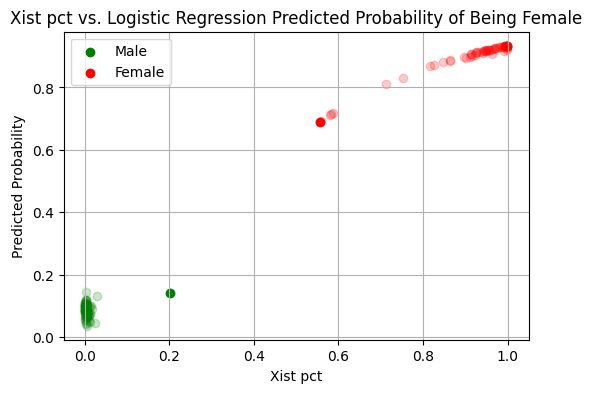

In [13]:
y_pred_proba = model.predict_proba(X_known)[:, 1]
y_pred = model.predict(X_known)

# Extract pct_xist values for the test set
xist_pct_test = X[:, 0]

# Create a DataFrame for easier plotting
plot_df = pd.DataFrame({
    'xist_pct': np.array(pct_xist)[known_indices],
    'predicted_prob': 1-y_pred_proba,
    'real_value': y_known,
    'predicted_value': y_pred,
    'sra_id': np.array(sra)[known_indices],
})

#remove those where SRA_ID ends with _01
plot_df = plot_df[~plot_df['sra_id'].astype(str).str.endswith('_01')]

# Create a column for coloring based on prediction accuracy
plot_df['color'] = np.where(plot_df['predicted_value'] == 1, 'green', 'red')
plot_df['prediction_status'] = np.where(plot_df['predicted_value'] == 1, 'Male', 'Female')

# Create the scatter plot
plt.figure(figsize=(6, 4))

# Plot correct predictions in green
correct_df = plot_df[plot_df['prediction_status'] == 'Male']
plt.scatter(correct_df['xist_pct'], correct_df['predicted_prob'], color='green', alpha=0.2)

# Plot incorrect predictions in red
incorrect_df = plot_df[plot_df['prediction_status'] == 'Female']
plt.scatter(incorrect_df['xist_pct'], incorrect_df['predicted_prob'], color='red',alpha=0.2)

#keep where real value doesnt match predicted_value
mislabeled_df = plot_df[plot_df['real_value'] != plot_df['predicted_value']]
# Plot correct predictions in green
correct_df = mislabeled_df[mislabeled_df['prediction_status'] == 'Male']
plt.scatter(correct_df['xist_pct'], correct_df['predicted_prob'], color='green', label='Male',alpha=1)

# Plot incorrect predictions in red
incorrect_df = mislabeled_df[mislabeled_df['prediction_status'] == 'Female']
plt.scatter(incorrect_df['xist_pct'], incorrect_df['predicted_prob'], color='red', label='Female',alpha=1)

plt.title('Xist pct vs. Logistic Regression Predicted Probability of Being Female')
plt.xlabel('Xist pct')
plt.ylabel('Predicted Probability')
plt.grid(True)
plt.legend()
# Save the plot
plt.savefig('xist_vs_logistic_regression_corrected.png')


In [14]:
plot_df[plot_df["sra_id"].isin(["SRX21170825","SRX21986110","SRX21986112","SRX29174028","SRX29174029"])]

,xist_pct,predicted_prob,real_value,predicted_value,sra_id,color,prediction_status
47,0.202532,0.140245,0.0,1.0,SRX21170825,green,Male
53,0.002765,0.080750,0.0,1.0,SRX21986110,green,Male
55,0.555357,0.690269,1.0,0.0,SRX21986112,red,Female
202,0.003899,0.081979,0.0,1.0,SRX29174028,green,Male
203,0.998861,0.933904,1.0,0.0,SRX29174029,red,Female


In [15]:
len(all_predictions)

223

In [16]:
#at least the first two of these, overwrite the sex values with predictions
new_sex[mislabeled_indices] = all_predictions[mislabeled_indices]

In [ ]:
#iterate through sra ids and add these vals back to df into column "Comp_sex"
df = pd.read_excel('/content/drive/MyDrive/pituitary_atlas/source_table/pituitary_atlas.xlsx')
for s in range(len(sra)):
  df.loc[df['SRA_ID'] == sra[s], 'Comp_sex'] = new_sex[s]
#save
df.to_excel('/content/drive/MyDrive/pituitary_atlas/source_table/pituitary_atlas.xlsx', index=False)

In [17]:
#print subtable of values where Sex_numeric and Comp_sex differ
#show all rows
pd.set_option('display.max_rows', None)
sub_df = df[(df['Sex_numeric'] != df['Comp_sex'])]
#show SRA_ID, Sex_numeric and Comp_sex
sub_df = sub_df[['SRA_ID', 'Sex_numeric', 'Comp_sex']]
sub_df

,SRA_ID,Sex_numeric,Comp_sex
45,ERX7593481,0.50,1.0
46,ERX7593482,0.50,0.0
47,ERX7593483,0.50,1.0
48,ERX7593484,0.50,1.0
51,SRX21170825,0.00,1.0
57,SRX21986110,0.00,1.0
59,SRX21986112,1.00,0.0
77,SRX15581371,0.75,0.0
80,SRX8497092,-1.00,1.0
81,SRX8497093,-1.00,0.0


# ATAC-seq

In [18]:
adata = sc.read("/content/drive/MyDrive/pituitary_atlas/Unstructured/pb_h5ad_0904.h5ad")

In [19]:
adata.var_names

Index(['chr10:100009655-100010156', 'chr10:100015498-100015999',
       'chr10:100016313-100016814', 'chr10:100022116-100022617',
       'chr10:100024655-100025156', 'chr10:100053925-100054426',
       'chr10:100059350-100059851', 'chr10:100065908-100066409',
       'chr10:10006837-10007338', 'chr10:10008134-10008635',
       ...
       'chrX:99975861-99976362', 'chrX:9998339-9998840',
       'chrY:1010045-1010546', 'chrY:1244720-1245221', 'chrY:1245531-1246032',
       'chrY:1246059-1246560', 'chrY:808940-809441', 'chrY:872842-873343',
       'chrY:897278-897779', 'chrY:897788-898289'],
      dtype='object', length=228058)

In [20]:
y_tag = "chrY"
x_tag = "chrX"

adata.var["chrX"] = adata.var_names.str.startswith(x_tag)
adata.var["chrY"] = adata.var_names.str.startswith(y_tag)

sc.pp.calculate_qc_metrics(adata, qc_vars=["chrY","chrX"], inplace=True, percent_top=[20], log1p=True)
adata.obs

,sample,cell_type,Sex,_scvi_batch,_scvi_labels,psbulk_n_cells,psbulk_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_chrY,log1p_total_counts_chrY,pct_counts_chrY,total_counts_chrX,log1p_total_counts_chrX,pct_counts_chrX
GSM4594382_Corticotrophs,GSM4594382,Corticotrophs,1.0,0,0,107.0,1559646.0,160681,11.987183,1559646.0,14.259970,0.225372,80.0,4.394449,0.005129,27274.0,10.213726,1.748730
GSM4594385_Corticotrophs,GSM4594385,Corticotrophs,0.0,3,0,264.0,2152282.0,165602,12.017349,2152282.0,14.582040,0.260514,0.0,0.000000,0.000000,39116.0,10.574312,1.817420
GSM4594386_Corticotrophs,GSM4594386,Corticotrophs,0.0,4,0,391.0,1759613.0,169223,12.038979,1759613.0,14.380605,0.243917,0.0,0.000000,0.000000,30966.0,10.340677,1.759819
GSM4594387_Corticotrophs,GSM4594387,Corticotrophs,0.0,5,0,571.0,2577337.0,182757,12.115918,2577337.0,14.762268,0.225543,0.0,0.000000,0.000000,46964.0,10.757158,1.822191
GSM4594388_Corticotrophs,GSM4594388,Corticotrophs,0.0,6,0,663.0,5128298.0,200554,12.208844,5128298.0,15.450285,0.224031,0.0,0.000000,0.000000,91972.0,11.429251,1.793421
GSM4594389_Corticotrophs,GSM4594389,Corticotrophs,0.0,7,0,653.0,3200072.0,191364,12.161938,3200072.0,14.978684,0.242432,0.0,0.000000,0.000000,56861.0,10.948382,1.776866
GSM4594390_Corticotrophs,GSM4594390,Corticotrophs,1.0,8,0,189.0,1000699.0,148724,11.909854,1000699.0,13.816211,0.324373,37.0,3.637586,0.003697,16728.0,9.724899,1.671631
GSM5712758_Corticotrophs,GSM5712758,Corticotrophs,1.0,9,0,195.0,1217930.0,157513,11.967270,1217930.0,14.012664,0.250753,45.0,3.828641,0.003695,21608.0,9.980865,1.774158
GSM5712759_Corticotrophs,GSM5712759,Corticotrophs,1.0,10,0,138.0,2046595.0,160501,11.986062,2046595.0,14.531689,0.272697,134.0,4.905275,0.006547,36250.0,10.498222,1.771235
GSM5712762_Corticotrophs,GSM5712762,Corticotrophs,1.0,13,0,176.0,658637.0,136496,11.824058,658637.0,13.397929,0.274962,27.0,3.332205,0.004099,10952.0,9.301369,1.662828


<Axes: xlabel='Sex', ylabel='log1p_total_counts_chrY'>

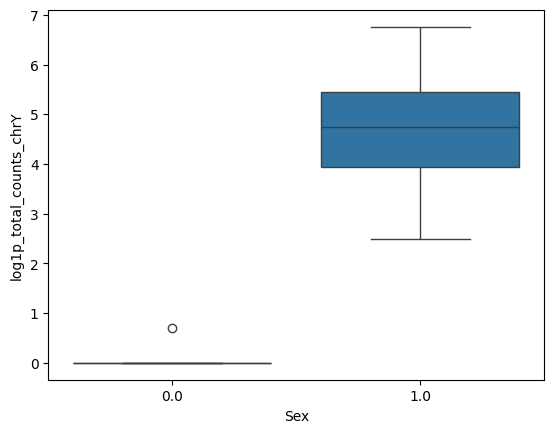

In [22]:
import seaborn as sns
sns.boxplot(x="Sex", y="log1p_total_counts_chrY", data=adata.obs)

# Looks good, Male samples are indeed rich in Y chrom content and females are empty.



In [23]:
!pip freeze

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.0
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.16.5
altair==5.5.0
anndata==0.12.2
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array-api-compat==1.12.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.10.6.0.35.25
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.0.1
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.2
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.24.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.10.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
chardet==5.2.0
c